# Redes Neurais e Deep Learning 06

> Um neurônio artificial é uma unidade de computação que não difere de alguns algoritmos de Machine learning tradicionais.

> Quando essas unidades são combinadas, funções complexas podem ser representadas de maneira mais facilitada.

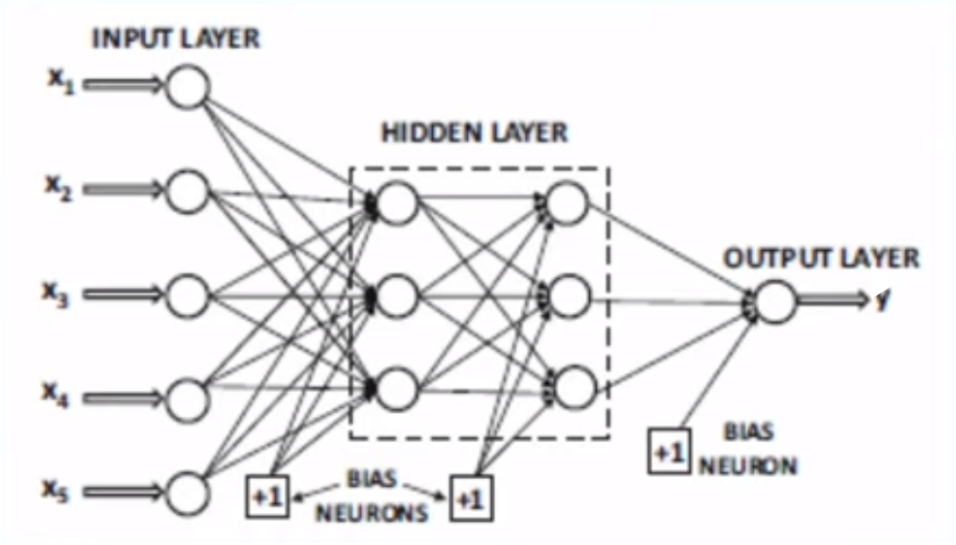

In [2]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Curso\datasets\RNA.png')

# Exibir a imagem
imagem

## Redes Neurais

> Cada unidade de processamento pode ser pensada como um 'bloco de construção', com características particulares.

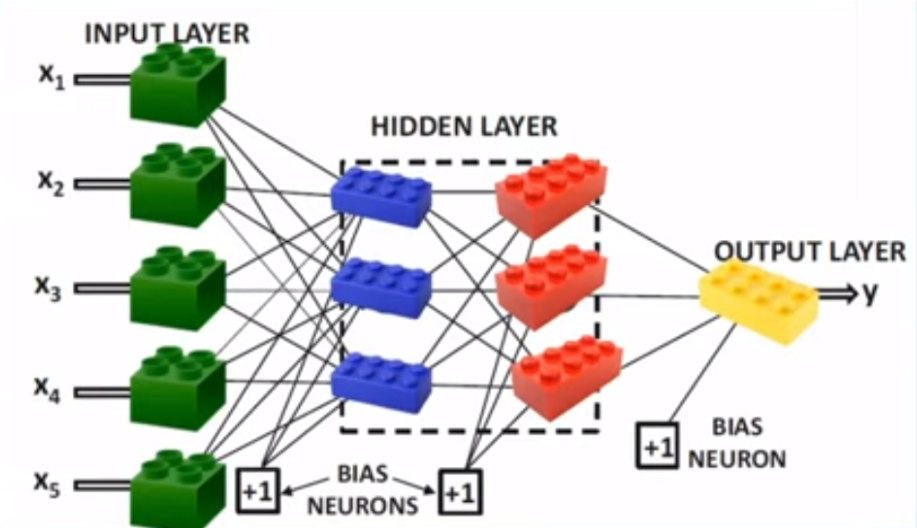

In [7]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Curso\datasets\RNA2.png')

# Exibir a imagem
imagem

## Redes rasas x Redes profundas

> Costuma-se dizer que uma rede neural é 'deep' quando ela possui mais de uma camada oculta de processamento.

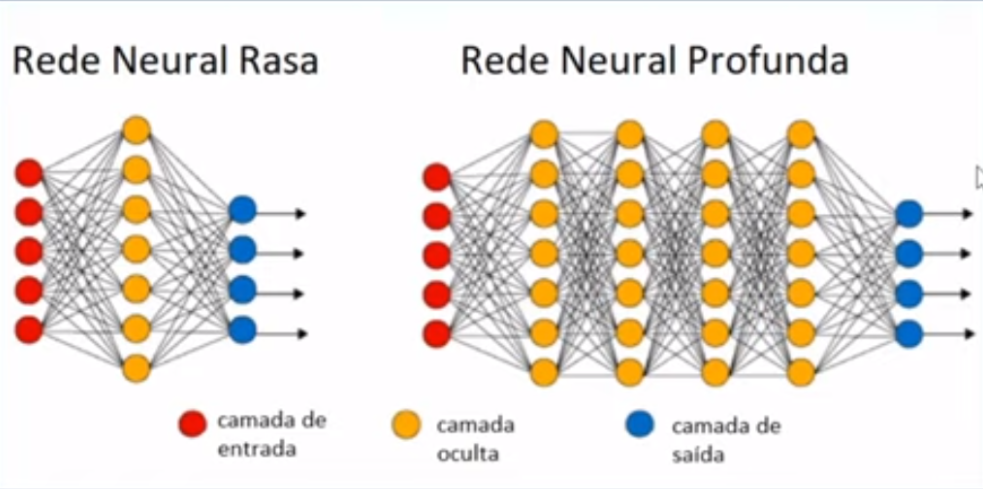

In [5]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Curso\datasets\RNA_Profundidade.png')

# Exibir a imagem
imagem

## Reconhecimento em uma Rede Neural Profunda

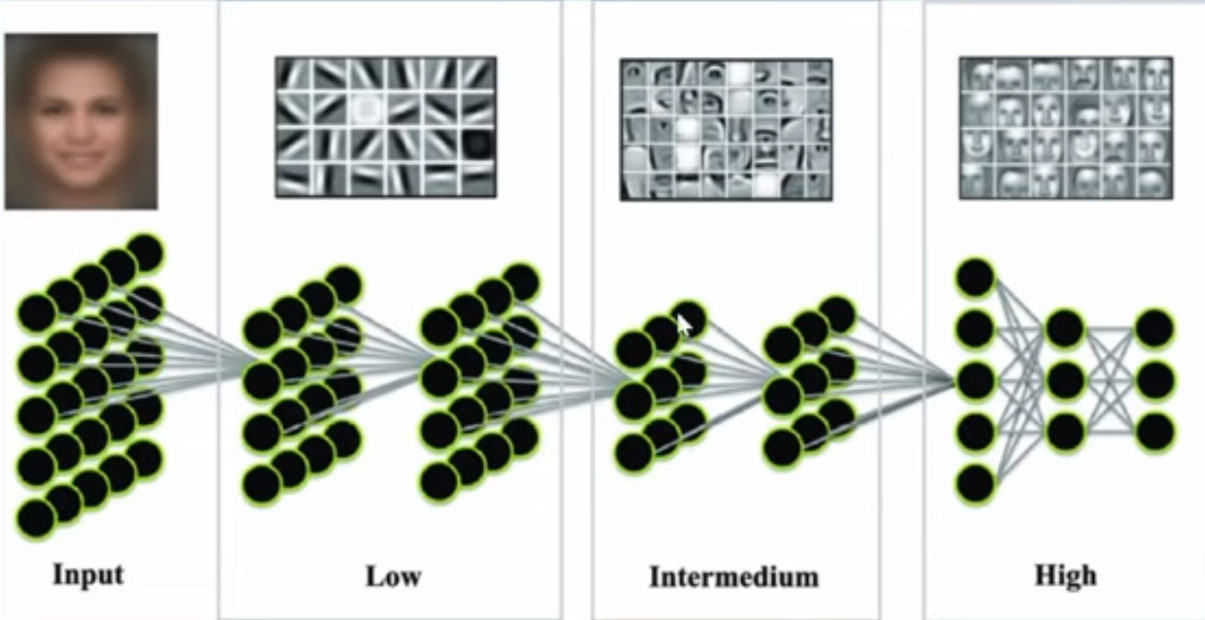

In [6]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Curso\datasets\RNA_Reconhecimento.png')

# Exibir a imagem
imagem

# Stroke Prediction

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sk

In [14]:
tf.__version__

'2.16.1'

## Carregando a Base de Dados

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [23]:
dataset = pd.read_csv(r"D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Curso\datasets\stroke.csv")

dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Pré-processamento da base de dados

1. Remoção de linhas nulas
2. Separação dos dados em X (variáveis independentes) e y (variável dependente)
3. Transformação das variáveis categóricas em numéricas (LabelEncoder e OneHotEncoder)
4. Separação em Teste e Treino
5. Normalização

### 1. Remoção de linhas nulas

In [24]:
dataset[dataset.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [25]:
#dataset[dataset.isnull().any(axis=1)] quantas linhas nulas?
dataset = dataset.dropna()

dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### 2. Separação dos dados em X (variáveis independentes) e y (variável dependente)

In [26]:
x = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


### 3. Transformação das variáveis categóricas em numéricas (LabelEncoder e OneHotEncoder)

In [28]:
x.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [29]:
x['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder

cols = ['ever_married', 'Residence_type'] #unique pra descobrir quantos rótulos únicos
le = LabelEncoder()
x[cols] = x[cols].apply(le.fit_transform)

x.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked
5,Male,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked
6,Male,74.0,1,1,1,Private,0,70.09,27.4,never smoked
7,Female,69.0,0,0,0,Private,1,94.39,22.8,never smoked
9,Female,78.0,0,0,1,Private,1,58.57,24.2,Unknown
10,Female,81.0,1,0,1,Private,0,80.43,29.7,never smoked
11,Female,61.0,0,1,1,Govt_job,0,120.46,36.8,smokes


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 

#https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['gender', 'work_type', 'smoking_status'])], 
                       remainder='passthrough')
x = ct.fit_transform(x)

x[0]

array([  0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,  67.  ,   0.  ,   1.  ,   1.  ,
         1.  , 228.69,  36.6 ])

In [32]:
colunas = ['ohe1', 'ohe2', 'ohe3', 'ohe4', 'ohe5', 'ohe6', 'ohe7', 'ohe8', 'ohe9', 'ohe10', 'ohe11', 
           'ohe12', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 
           'avg_glucose_level', 'bmi']
pd.DataFrame(x, columns=colunas)

,ohe1,ohe2,ohe3,ohe4,ohe5,ohe6,ohe7,ohe8,ohe9,ohe10,ohe11,ohe12,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,81.0,0.0,0.0,1.0,1.0,186.21,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,103.08,18.6
4905,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,1.0,1.0,125.20,40.0
4906,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,1.0,0.0,82.99,30.6
4907,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,166.29,25.6


### 4. Separação em Teste e Treino

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.9)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train

array([[ 0.85882982, -0.85882982,  0.        , ...,  1.04595272,
        -0.02431802, -0.05664971],
       [-1.16437504,  1.16437504,  0.        , ...,  1.04595272,
         1.94332512,  1.62163874],
       [ 0.85882982, -0.85882982,  0.        , ..., -0.95606616,
        -0.64361694,  1.59499924],
       ...,
       [-1.16437504,  1.16437504,  0.        , ..., -0.95606616,
         1.81554741,  2.11446947],
       [ 0.85882982, -0.85882982,  0.        , ...,  1.04595272,
        -0.54232973, -0.3763237 ],
       [-1.16437504,  1.16437504,  0.        , ..., -0.95606616,
         3.0263191 ,  2.22102747]])

### Arquitetura de Rede Neural (MLP)

In [37]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
ann.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7001 - loss: 0.5966
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8162 - loss: 0.5339
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8847 - loss: 0.4544 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9036 - loss: 0.4437 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9360 - loss: 0.3958 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9311 - loss: 0.3656 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9352 - loss: 0.3234 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9335 - loss: 0.3172 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9378 - loss: 0.2795 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9453 - loss: 0.2538 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9306 - loss: 0.2654
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9

## Resultados

In [39]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

pred_array = 1 * y_pred.reshape(len(y_pred), 1)
test_array = y_test.values.reshape(len(y_test), 1)

np.concatenate([pred_array, test_array], axis=1)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) 
#vn, fp(rede disse que é 1, mas é 0), fn (rede disse que é 0, mas é 1), vp

cm

array([[4228,   10],
       [ 180,    1]], dtype=int64)

In [45]:
import plotly.express as px

fig = px.imshow(cm, text_auto=True, title="Matriz de Confusão")
fig.show()

In [41]:
accuracy_score(y_test, y_pred)

0.9570038470242136

In [46]:
dataset['stroke'].value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64